In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import pickle
from sklearn.metrics import confusion_matrix

In [4]:
path=r"C:\\Users\\devma\\OneDrive\\Desktop\\Project\\Codes_Old\\"
X=pickle.load(open((path+"X_new.pickle"),'rb'))
y=pickle.load(open((path+"y_new.pickle"),'rb'))

X=X/255.0
y= np.asarray(y).astype('float32').reshape((-1,1))

In [5]:
Y = np_utils.to_categorical(y, 2)

In [6]:
y.shape

(1706, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_train)
y_test = np.array(y_train)

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [200, 200,3]),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 64)                7680064   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,682,177
Trainable params: 7,682,177
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
model_history = model.fit(X_train, y_train, batch_size=60, validation_split=0.2, epochs = 50)

Epoch 1/50
19/19 [==============================] - 1s 49ms/step - loss: 3.3112 - accuracy: 0.6242 - val_loss: 1.2632 - val_accuracy: 0.3700
Epoch 2/50
19/19 [==============================] - 1s 37ms/step - loss: 0.6132 - accuracy: 0.7351 - val_loss: 0.5902 - val_accuracy: 0.7289
Epoch 3/50
19/19 [==============================] - 1s 36ms/step - loss: 0.4719 - accuracy: 0.7938 - val_loss: 0.4733 - val_accuracy: 0.7619
Epoch 4/50
19/19 [==============================] - 1s 36ms/step - loss: 0.3999 - accuracy: 0.8158 - val_loss: 0.4893 - val_accuracy: 0.7692
Epoch 5/50
19/19 [==============================] - 1s 36ms/step - loss: 0.3651 - accuracy: 0.8414 - val_loss: 0.9915 - val_accuracy: 0.5201
Epoch 6/50
19/19 [==============================] - 1s 35ms/step - loss: 0.5013 - accuracy: 0.7947 - val_loss: 0.8624 - val_accuracy: 0.7399
Epoch 7/50
19/19 [==============================] - 1s 35ms/step - loss: 0.4674 - accuracy: 0.8020 - val_loss: 0.6811 - val_accuracy: 0.7436
Epoch 8/50
19

In [12]:
model.evaluate(X_test, y_test)

43/43 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9787


[0.09643157571554184, 0.9787390232086182]

In [13]:
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 

In [14]:
y_probs = model.predict(X_test)
y_preds = np.round(model.predict(X_test),0)

y_preds[:100]


43/43 [==============================] - 0s 6ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

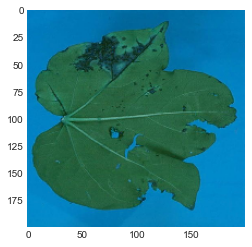

In [28]:
import cv2
img_array=cv2.imread('H2.jpg')
new_array = cv2.resize(img_array, (200,200))
k=np.array(new_array).reshape(-1,200,200,3)
k=k/255.0
plt.imshow(new_array)
plt.show()

In [29]:
pre=model.predict(k)
np.round(pre,0)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

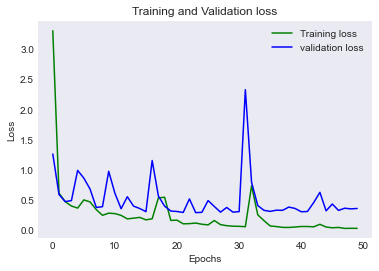

In [17]:
loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

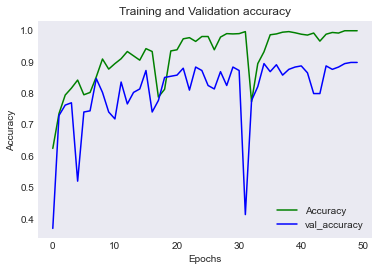

In [18]:
acc_train = model_history.history['accuracy']
acc_val = model_history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, acc_train, 'g', label='Accuracy')
plt.plot(epochs, acc_val, 'b', label='val_accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

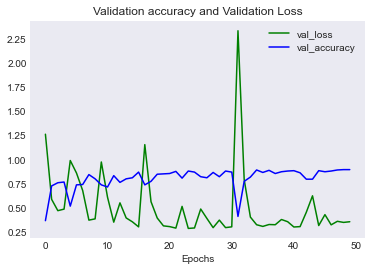

In [19]:
loss_train = model_history.history['val_loss']
loss_val = model_history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='val_loss')
plt.plot(epochs, loss_val, 'b', label='val_accuracy')
plt.title('Validation accuracy and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       340
         1.0       1.00      0.98      0.99      1024

    accuracy                           0.98      1364
   macro avg       0.96      0.98      0.97      1364
weighted avg       0.98      0.98      0.98      1364



In [23]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

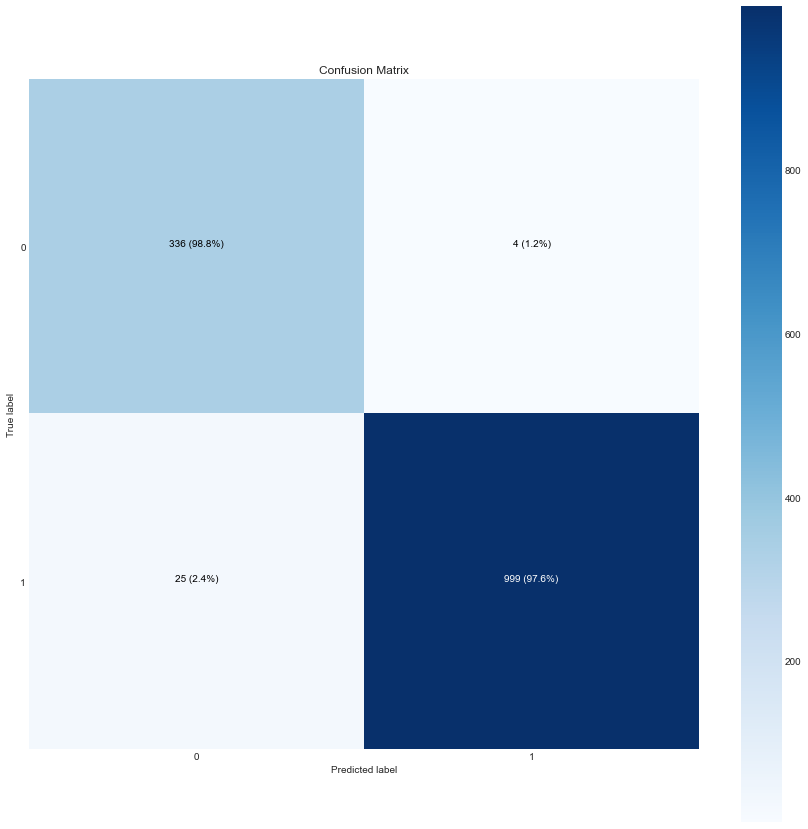

In [25]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      figsize=(15, 15),
                      text_size=10)